#### Problem Statement: 
    
    You were recently hired in start up company and you were asked to build a system to identify spam emails.

### IMPORTING LIBRARIES

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report, precision_score, recall_score, roc_auc_score
from sklearn.externals import joblib

import warnings
warnings.filterwarnings("ignore") 
#Setting column width
pd.set_option('max_colwidth', 400)

### IMPORT DATASET

In [166]:
df = pd.read_csv('D:/DATASCIENCE/Fliprobo/Project_2/Project_2/messages.csv')

In [167]:
df.head(10)

,subject,message,label
0,job posting - apple-iss research center,"content - length : 3386 apple-iss research center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , inclu...",0
1,NaN,"lang classification grimes , joseph e . and barbara f . grimes ; ethnologue language family index ; pb . isbn : 0-88312 - 708 - 3 ; vi , 116 pp . ; $ 14 . 00 . summer institute of linguistics . this companion volume to ethnologue : languages of the world , twelfth edition lists language families of the world with sub-groups shown in a tree arrangement under the broadest classification of langu...",0
2,query : letter frequencies for text identification,"i am posting this inquiry for sergei atamas ( satamas @ umabnet . ab . umd . edu ) , a research associate at the university of maryland at baltimore . his field is molecular biology , and his work involves comparing dna strings using various algorithms . i do n't understand the details well enough to pass them along . at any rate , one such algorithm relies upon frequencies with which the lett...",0
3,risk,a colleague and i are researching the differing degrees of risk perceived by our hong kong students in different contexts where spoken english is required . we would be interested to find out more about research in the area of risk-taking in language learning . so far we have n't come up with much . can anyone help here ?\n,0
4,request book information,"earlier this morning i was on the phone with a friend of mine living in south america . as we were talking in spanish , he said : "" si voy a la liberi ' a , comprare ' el libro "" which can be rendered into english as "" if i go to the bookstore , i will purchase it "" . i found this expression a bit unusual so i asked him saying that he really meant to say "" si fuese a la libreri ' a , comprari ...",0
5,call for abstracts : optimality in syntactic theory,"content - length : 4437 call for papers is the best good enough ? workshop on optimality in syntactic theory to be held at the massachusetts institute of technology , cambridge , ma , may 19-21 1995 . syntactic research in a variety of frameworks is assigning a growing role to the notion of comparison . this work , which is at the forefront of current research , includes theories involving pri...",0
6,m . a . in scandinavian linguistics,"m . a . in scandinavian linguistics at the university of tromsoe 1995-1996 ( corrected version ) the linguistics section of the institute for language and literature at the university of tromsoe , norway , offers a one year course leading up to a master of arts degree , starting the fall of 1995 . the course is designed to prepare students for research in generative syntax and phonology with s...",0
7,call for papers : linguistics session of the m / mla,"call for papers linguistics session - - midwest modern language association , st . louis , missouri , november 2 - 4 , 1995 topic : dialogue in fiction - - applications of theories / approaches from linguistic and cognitive sciences to dialogue in fiction . papers may explain how dialogue in fiction works ( with or without comparison to real conversation ) ; revise existing theories of languag...",0
8,foreign language in commercials,"content - length : 1937 greetings ! i ' m wondering if someone out there can identify the languages used in two recent ibm commercials . they have out a series of three ads with people in different countries talking about ibm equipment and services . one ad has two old gentlemen walking along what looks like the seine , speaking french . a second ad has two men sitting in what is apparently a ...",0
9,fulbright announcement : please post / disseminate to lists,"fulbright announcement : please p

By reading the message I can observed that label 0 belongs to ham and 1 belongs to spam

In [168]:
#Droping subject

df.drop(['subject'],axis=1,inplace=True)

In [169]:
df['label'].value_counts()

0    2412
1     481
Name: label, dtype: int64

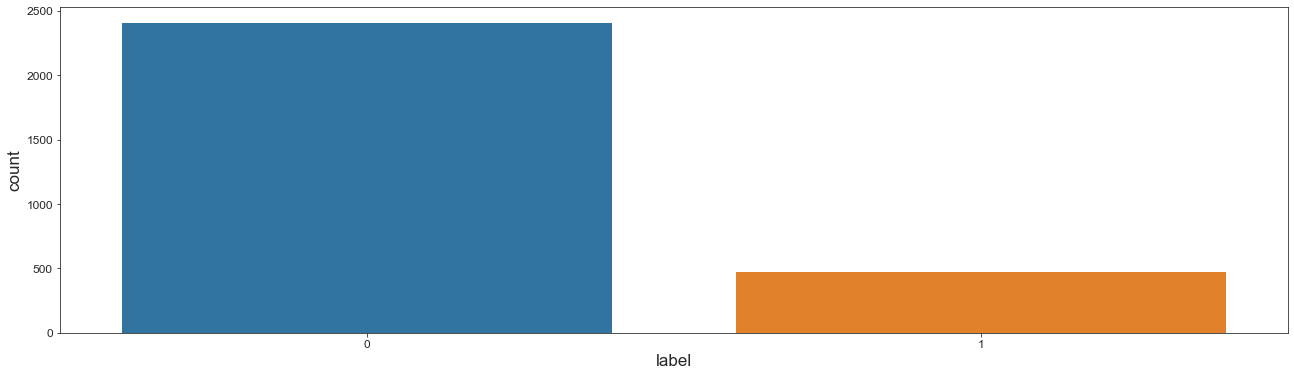

In [285]:
sns.countplot(df['label'],data=df)

In [170]:
df.shape

(2893, 2)

In [171]:
df['message_length'] = df['message'].str.len()

In [172]:
df

,message,label,message_length
0,"content - length : 3386 apple-iss research center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , inclu...",0,2856
1,"lang classification grimes , joseph e . and barbara f . grimes ; ethnologue language family index ; pb . isbn : 0-88312 - 708 - 3 ; vi , 116 pp . ; $ 14 . 00 . summer institute of linguistics . this companion volume to ethnologue : languages of the world , twelfth edition lists language families of the world with sub-groups shown in a tree arrangement under the broadest classification of langu...",0,1800
2,"i am posting this inquiry for sergei atamas ( satamas @ umabnet . ab . umd . edu ) , a research associate at the university of maryland at baltimore . his field is molecular biology , and his work involves comparing dna strings using various algorithms . i do n't understand the details well enough to pass them along . at any rate , one such algorithm relies upon frequencies with which the lett...",0,1435
3,a colleague and i are researching the differing degrees of risk perceived by our hong kong students in different contexts where spoken english is required . we would be interested to find out more about research in the area of risk-taking in language learning . so far we have n't come up with much . can anyone help here ?\n,0,324
4,"earlier this morning i was on the phone with a friend of mine living in south america . as we were talking in spanish , he said : "" si voy a la liberi ' a , comprare ' el libro "" which can be rendered into english as "" if i go to the bookstore , i will purchase it "" . i found this expression a bit unusual so i asked him saying that he really meant to say "" si fuese a la libreri ' a , comprari ...",0,1046
...,...,...,...
2888,hello thanks for stopping by ! ! we have taken many new pics and made some hot new videos ! they are the most erotic we have done ! stop by and be our guest for oodles of free fun ! click here and enter we thank you for all your business in the past ! the haven\n,1,262
2889,"the list owner of : "" kiddin "" has invited you to join their mailing list at listbot . you must reply to this message to join the list . = = simply reply with a blank message to join . = = the list owner has included the following welcome message : = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = hi guys ! this is just a quic...",1,2163
2890,"judging from the return post , i must have sounded like some kind of self-proclaimed expert on composers ' names . let me hasten to say that i ' m not . all the pronunciations i put in that little list came as surprises to me . in all cases but one , they were given to me by native speakers of the composers ' language , while i was visiting the composers ' native country . i do n't speak any o...",0,1039
2891,"gotcha ! there are two separate fallacies in the argument against n-ary comparison which i discussed recently and which powers , delancey , and guy are now apparently seeking to defend . ( 1 ) janhunen says that the probability of a match occurring purely by chance when you compare japanese with four languages is four times what it is when you compare it with one language . this simply cannot ...",0,2949


### Prepare the Data

In [173]:
wnl = nltk.WordNetLemmatizer()

def data_prepare(text):
    
    #Lower case the text
    text = text.lower()
    
    #normalizing URLs
    text = re.sub(r'http\S+', 'weburl', text)
    
    #normalizing email ids
    text = re.sub('([A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,})', 'emailid', text)
    
    # replace dollar with dollar
    text = re.sub(r'£|\$', 'dollar', text)
    
    #replace mobile number with strig mobilenumber
    text = re.sub('(?:\+ *)?\d[\d\- ]{7,}\d', 'mobilenumber', text)
    
    #replace any numbers with string 'numbr'
    text = re.sub(r'\d+(\.\d+)?', 'numbr',text)
    
    # Remove punctuation
    text = text.replace(r'[^\w\d\s]', ' ')

    # Replace whitespace between terms with a single space
    text = text.replace(r'\s+', ' ')

    # Remove leading and trailing whitespace
    review_text = text.replace(r'^\s+|\s+?$', '')
    
     #Cleaning text with regular expression
    review_text = re.sub(r"\'s", " 's ", review_text)
    review_text = re.sub(r"\'ve", " 've ", review_text)
    review_text = re.sub(r"n\'t", " 't ", review_text)
    review_text = re.sub(r"\'re", " 're ", review_text)
    review_text = re.sub(r"\'d", " 'd ", review_text)
    review_text = re.sub(r"\'ll", " 'll ", review_text)
    review_text = re.sub(r",", " ", review_text)
    review_text = re.sub(r"\.", " ", review_text)
    review_text = re.sub(r"!", " ", review_text)
    review_text = re.sub(r"\(", " ( ", review_text)
    review_text = re.sub(r"\)", " ) ", review_text)
    review_text = re.sub(r"\?", " ", review_text)
    review_text = re.sub(r"\s{2,}", " ", review_text)
      
    #Tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    #Removing stopwords
    stopword = stopwords.words('english')
    text = [word for word in text if word not in stopword if(len(word)>3)]
    
    #Lemmatize words
    review_text = ' '.join([wnl.lemmatize(word) for word in text if(len(word)>3)])
    
   
    return review_text

In [157]:
text = "3386 wakhariyad@gmail.com words 123 https://earnwealth.in 956-199-8289 APPLE-iss research 2 center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics "
ret = data_prepare(text)
print(ret)

numbr emailid word numbr weburl mobilenumber apple-iss research numbr center dollar numbr million joint venture apple computer institute system science national university singapore located singapore looking senior speech scientist successful candidate research expertise computational linguistics


In [174]:
df['clean_message'] = df['message'].apply(lambda x: data_prepare(x))

In [178]:
df['clean_length'] = df['clean_message'].str.len()

In [179]:
df.sample(5)

,message,label,message_length,clean_message,clean_length
1802,"content - length : 15848 dear fellow linguist , if you are a user of reference grammars and are willing to invest some seven or ten minutes , you can contribute to shaping the format of an electronic framework for reference grammars we are about to develop . we are eager to have your opinion on what a good reference grammar should look like . for that purpose we have formulated a set of multip...",0,18678,content length numbr dear fellow linguist user reference grammar willing invest seven minute contribute shaping format electronic framework reference grammar develop eager opinion good reference grammar look like purpose formulated multiple choice question plus open question divided four major group quantity quality organisation ergonomy reference grammar minute would happy reaction also starr...,6506
714,"conference announcement first international conference on the mental lexicon edmonton , canada , september 3 - 5 , 1998 the conference will be held in the campus of the university of alberta . the program of the conference ( including all platform and poster sessions ) and other information are available at the conference website : http : / / www . ualberta . ca / ~ linguis / lexiconf . html _...",0,885,conference announcement first international conference mental lexicon edmonton canada september numbr numbr numbr conference held campus university alberta program conference including platform poster session information available conference website http ualberta linguis lexiconf html roberto almeida roberto ualberta department linguistics university alberta phone numbr numbr-numbr office edmo...,471
1909,"= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 2nd call for papers : deadline march 2 , 1998 = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = third conference on empirical methods in natural language processing ( emnlp - 3 ) when : tuesday , june 2 , 1998 ( fo...",0,4425,numbrnd call paper deadline march numbr numbr third conference empirical method natural language processing emnlp numbr tuesday june numbr numbr following first international conference language resource evaluation workshop translingual information management granada spain conference description spirit sigdat event conference offer general forum novel research corpus-based statistical natural ...,3196
1952,"dear colleagues , in april i sent a query to linguist about synthetic compounds . i received over 30 replies . i have tried to respond personally to all of the replies , but a couple of my messages bounced . i apologize to anyone i missed . i appreciated all of the response i received . i am proud to be a part of intellectual community where so many people are eager to share their hard won kno...",0,13901,dear colleague april sent query linguist synthetic compound received numbr reply tried respond personally reply couple message bounced apologize anyone missed appreciated response received proud part intellectual community many people eager share hard knowledge summary learned follows divided four part part numbr present question taken given initial query part numbr consists bibliography work ...,8948
2619,"content - length : 350 in some languages which are standarly described as genderless it is still the case , i am pretty sure , that people say things like ' that woman ' instead of 's he ' and because this looks like a purely lexical matter , the appearance of genderlessness is preserved . i wonder if this applies to the languages recently described as genderless on this list .\n",0,381,content length numbr language standarly described genderless still case pretty sure people thing like woman instead look like purely lexical matter appearance genderlessness preserved wonder applies language recently described genderless list,242


### EDA

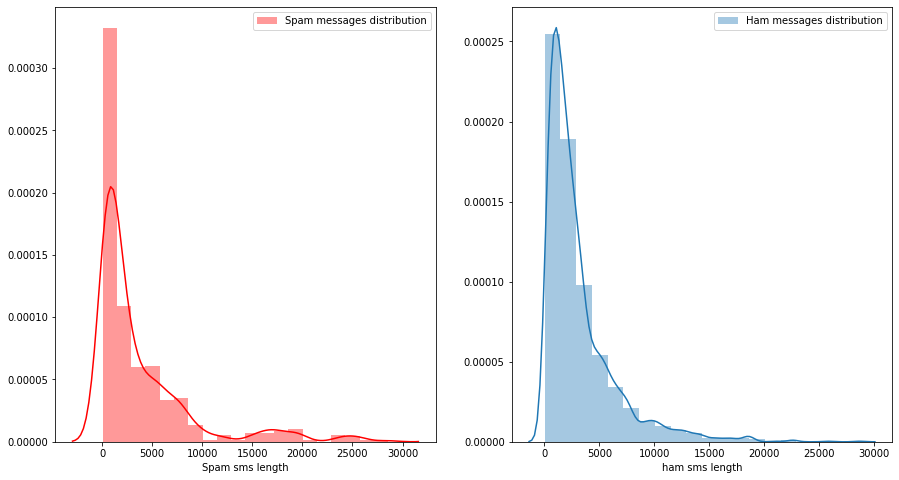

In [188]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['message_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(df[df['label']==0]['message_length'],bins=20,ax=ax[1],label='Ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

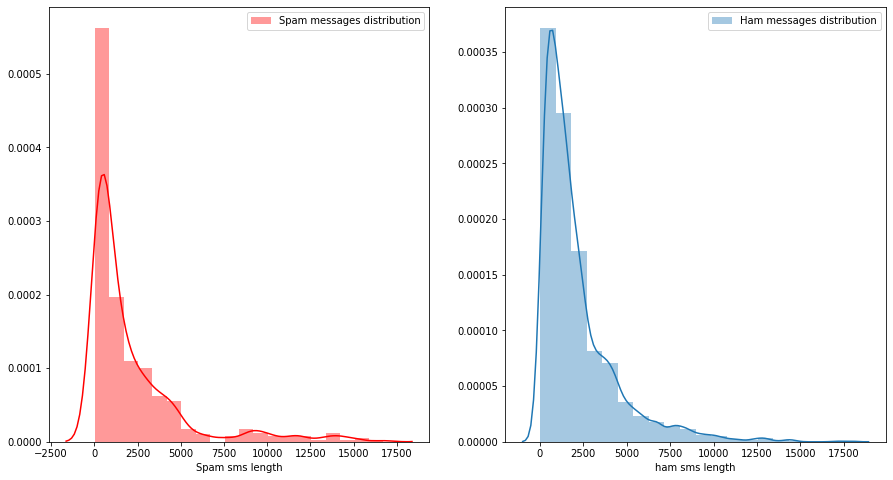

In [183]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['clean_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(df[df['label']==0]['clean_length'],bins=20,ax=ax[1],label='Ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

Distribution has been reduced

#### WORD CLOUD

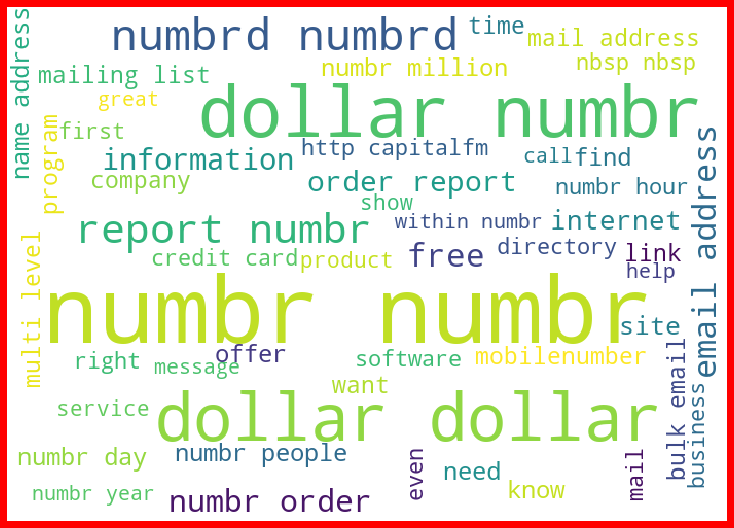

In [186]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = df['clean_message'][df['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

As we can see, there are many words such as bulk email, program, service, mobilenumber, dollar indicated spam message.

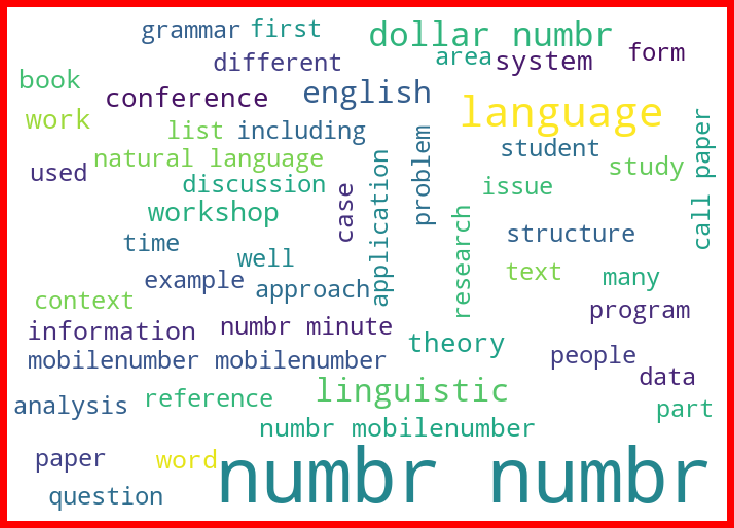

In [187]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = df['clean_message'][df['label']==0]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In the above wordcloud we can see that there are many words which we use is our daily life for communication, such as information, time, discussion, issue etc.

### Feature Extraction

In [231]:
tf_vec = TfidfVectorizer()

features = tf_vec.fit_transform(df['clean_message'])

X = features
y = df['label']

### Preprocessing

In [232]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,random_state=42,test_size=0.2)

Checking the distribution of data

In [238]:
print('train_X :', X_train.shape)
print('train_y  :', y_train.shape)
print('test_X :', X_test.shape)
print('test_y  :', y_test.shape)

train_X : (2314, 49487)
train_y  : (2314,)
test_X : (579, 49487)
test_y  : (579,)


### Training Model

In [278]:
def model_assessment(y_test,predicted_class,model_name):
    print('confusion matrix')
    print(confusion_matrix(y_test,predicted_class))
    print('accuracy')
    print(accuracy_score(y_test,predicted_class))
    print('precision')
    print(precision_score(y_test,predicted_class,pos_label=1))
    print('recall')
    print(recall_score(y_test,predicted_class,pos_label=1))
    print('f-Score')
    print(f1_score(y_test,predicted_class,pos_label=1))
    print('AUC')
    print(roc_auc_score(np.where(y_test==1,1,0),np.where(predicted_class==1,1,0)))
    

In [279]:
models = {
    "SVC": svm.SVC(kernel="linear"),
    "MultinomialNB": MultinomialNB(),
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "BaggingClassifier": BaggingClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier()
}

In [282]:
prediction = dict()
score_map = {}

for model_name in models:
    print("TESTING MODEL ON ",model_name)
    model = models[model_name]
    model.fit(X_train,y_train)
    prediction[model_name] = model.predict(X_test)
    score = accuracy_score(y_test, prediction[model_name])
    score_map[model_name] = score
    
    print("CHECKING PERFORMANCE MATRIX OF", model_name)
    model_assessment(y_test,prediction[model_name],model_name)
    print("-----------------------------------------------------------------")
    print("")

TESTING MODEL ON  SVC
CHECKING PERFORMANCE MATRIX OF SVC
confusion matrix
[[463   1]
 [  8 107]]
accuracy
0.9844559585492227
precision
0.9907407407407407
recall
0.9304347826086956
f-Score
0.9596412556053812
AUC
0.9641398050974512
-----------------------------------------------------------------

TESTING MODEL ON  MultinomialNB
CHECKING PERFORMANCE MATRIX OF MultinomialNB
confusion matrix
[[464   0]
 [101  14]]
accuracy
0.8255613126079447
precision
1.0
recall
0.12173913043478261
f-Score
0.2170542635658915
AUC
0.5608695652173913
-----------------------------------------------------------------

TESTING MODEL ON  LogisticRegression
CHECKING PERFORMANCE MATRIX OF LogisticRegression
confusion matrix
[[463   1]
 [ 27  88]]
accuracy
0.9516407599309153
precision
0.9887640449438202
recall
0.7652173913043478
f-Score
0.8627450980392156
AUC
0.8815311094452773
-----------------------------------------------------------------

TESTING MODEL ON  KNeighborsClassifier
CHECKING PERFORMANCE MATRIX OF KNe

In [283]:
result = pd.DataFrame()
result["model"] = score_map.keys()
result["score"] = score_map.values()
result["score"] = result["score"].apply(lambda x: x*100)

In [284]:
def plot_model_performace(result):
    sns.set_style("ticks")
    figsize=(22, 6)

    ticksize = 12
    titlesize = ticksize + 8
    labelsize = ticksize + 5

    xlabel = "Model"
    ylabel = "Score"

    title = "Model Performance"

    params = {'figure.figsize' : figsize,
              'axes.labelsize' : labelsize,
              'axes.titlesize' : titlesize,
              'xtick.labelsize': ticksize,
              'ytick.labelsize': ticksize}

    plt.rcParams.update(params)

    col1 = "model"
    col2 = "score"
    sns.barplot(x=col1, y=col2, data=result)
    plt.title(title.title())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.grid()
    plt.plot()
    plt.show()
    print(result)

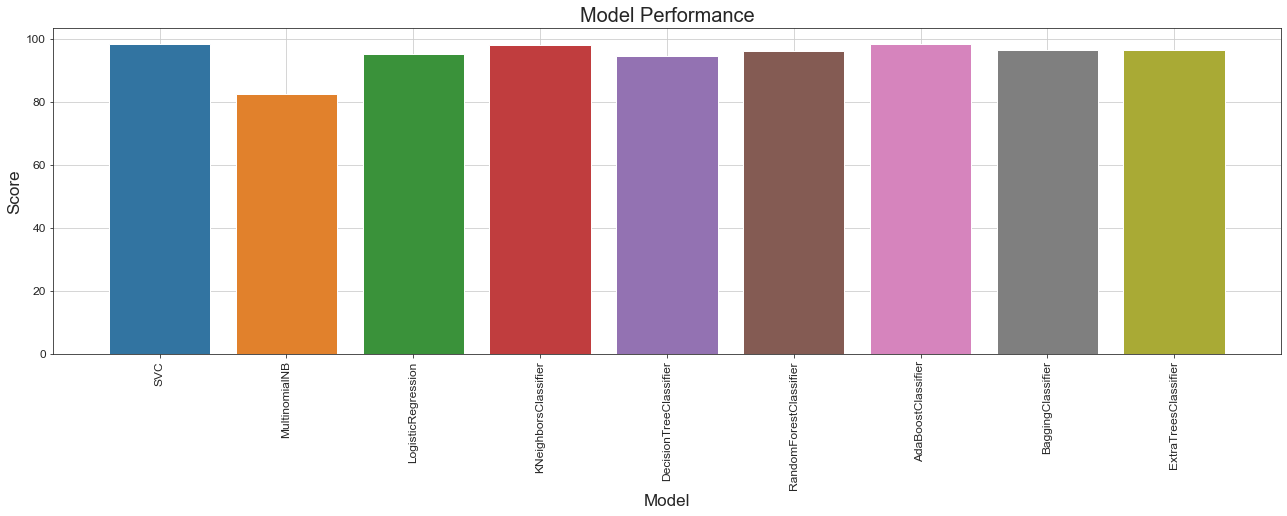

                    model      score
0                     SVC  98.445596
1           MultinomialNB  82.556131
2      LogisticRegression  95.164076
3    KNeighborsClassifier  97.927461
4  DecisionTreeClassifier  94.645941
5  RandomForestClassifier  96.200345
6      AdaBoostClassifier  98.445596
7       BaggingClassifier  96.545769
8    ExtraTreesClassifier  96.545769


In [244]:
plot_model_performace(result)

### SAVING MODEL

As, we got the best accuracy score for SVC, we'll save our final model for SVC

In [287]:
model = svm.SVC(kernel="linear")
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)

predicted_class = y_pred

print('confusion matrix')
print(confusion_matrix(y_test,predicted_class))
print('accuracy')
print(accuracy_score(y_test,predicted_class))
print('precision')
print(precision_score(y_test,predicted_class,pos_label=1))
print('recall')
print(recall_score(y_test,predicted_class,pos_label=1))
print('f-Score')
print(f1_score(y_test,predicted_class,pos_label=1))
print('AUC')
print(roc_auc_score(np.where(y_test==1,1,0),np.where(predicted_class==1,1,0)))

confusion matrix
[[463   1]
 [  8 107]]
accuracy
0.9844559585492227
precision
0.9907407407407407
recall
0.9304347826086956
f-Score
0.9596412556053812
AUC
0.9641398050974512


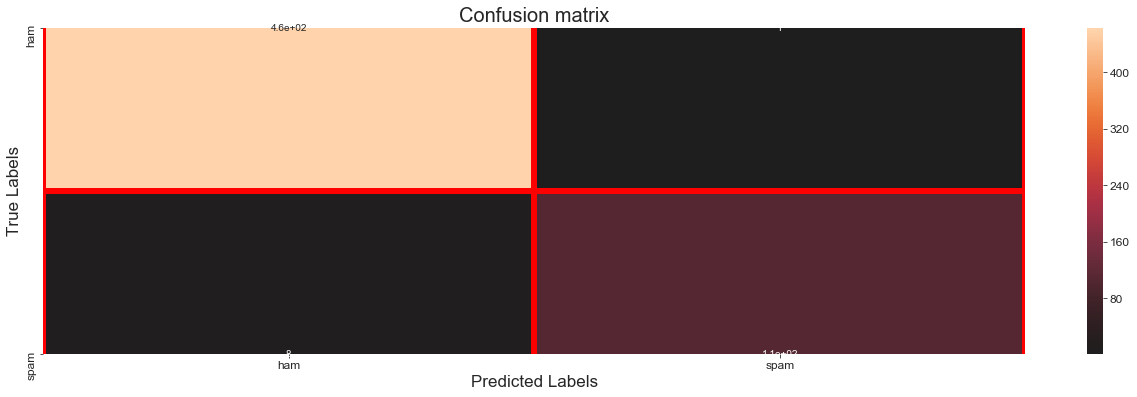

In [288]:
conf_mat = confusion_matrix(y_test,y_pred)
ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()

In [290]:
#saving model using 

joblib.dump(model, 'SpamMail.pkl')

['SpamMail.pkl']

### CONCLUSION

Here we have successfully classified spam and ham emails, we used data cleaning techniques along with feature selection usign tf idf vectorizer, also trained model on various classification algorithm and found SVC giving the best accuracy.